<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 09 Matrices

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

## Punto 1: **Modelo de encriptación**


Un proceso para encriptar un mensaje secreto es usar cierta matriz cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc. y espacio=27, se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arreglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

```
47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,
```


la primera fila del mensaje es `47,49,-19,257,487`

*¿Cual es el mensaje?*

## Punto 2: **Operaciones matricial con regresión lineal.**

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y minimizar el conjunto de parámetros de la regresión emplando algún método de minimización; otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


$$\Theta = (X^T X)^{-1} X^T y$$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, $X$ la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en $N$ dimensiones; la recta, plano o hiperplano puede ser calculado como:

$$Y=\Theta^T X$$


En el caso de dos dimensiones, supongamos que $X$, e $Y$ presentan un comportamiento lineal, y vienen dados por (en este caso el super indice es):


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

$$\Theta = (X^T X)^{-1} X^T y$$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```

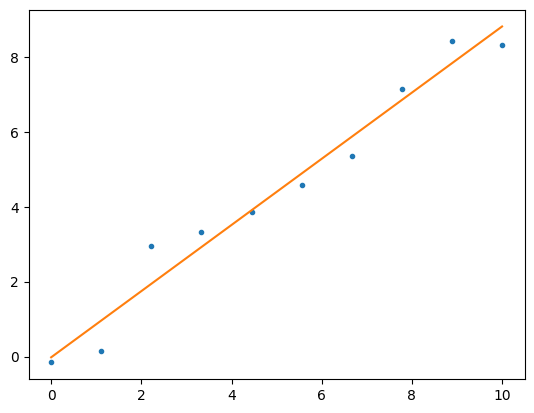

In [55]:
import matplotlib.pyplot as plt
import numpy as np

N = 10
X = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
Y = 0.9*X + noise

def MinCuad(X, Y):
    X=np.array([[1,x] for x in X])
    Y=np.array([[y] for y in Y])
    return np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@Y
r=MinCuad(X, Y)

plt.plot(X, Y, ".")
plt.plot(X, r[1]*X+r[0])

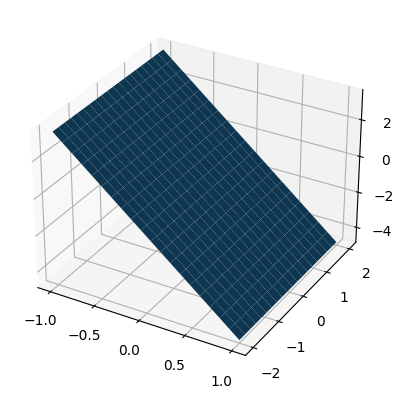

In [84]:
def MinCuad(X1, X2, Y):
    X=np.array([[1,X1[i], X2[i]] for i in range(len(X1))])
    Y=np.array([[y] for y in Y])
    theta=np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@Y
    return np.transpose(theta)@np.transpose(X)

N = 20
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)


N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, MinCuad(x1, x2, y))


## Punto 3: **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

a) Diagonalize $A$.

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

Matrix([[-2*t*exp(2*t) + 3*exp(4*t)/2 - exp(2*t)/2], [2*t*exp(2*t) - 3*exp(4*t)/2 + 5*exp(2*t)/2], [2*t*exp(2*t) + 3*exp(4*t)/2 + exp(2*t)/2]])


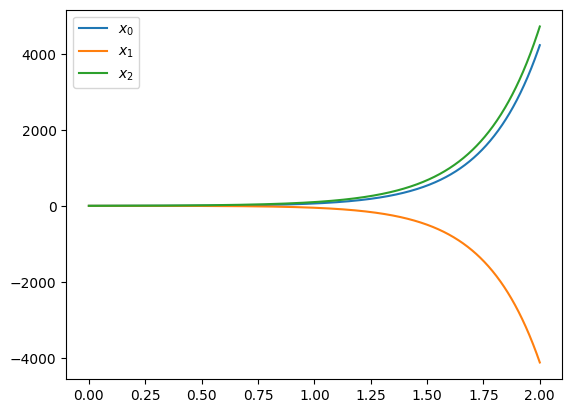

In [68]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

t=sp.Symbol("t")
C=sp.symbols("c1,c2,c3") # Incógnitas a la hora de resolver las ecuaciones diferenciales

A=sp.Matrix([[2, -1, 1],
            [0, 3, -1],
            [2, 1, 3]])

D=sp.Matrix([[2, 1, 0], [0, 2, 0], [0, 0, 4]]) #Calculando la matriz diagonal
U=sp.Matrix([[-1, 0, 1], [1, 1, -1], [1, 0, 1]]) #Calculando la matriz U


Y=sp.Matrix.zeros(3, 1)

for j in range(3): #Loops que resuelven el problema para la matriz diagonalizada
    for i in range(3):
        if i==j:
            Y[i]=C[i]*sp.exp(D[i, j]*t)+Y[i]
        else:
            Y[i]+=C[j]*D[i, j]*sp.exp(D[j, j]*t)*t

X=U*Y
X0=sp.Matrix([1, 1, 2])

Sol = sp.solve(X.subs({t:0})-X0, C) # Despejando los valores de las constantes c1, c2, c3
X=X.subs(Sol) # Solución al sistema de equaciones
print(X)

NX=np.array([sp.lambdify(t, x) for x in X])

T=np.linspace(0, 2, 1000)

for i in range(len(NX)):
    plt.plot(T, NX[i](T), label=f"$x_{i}$")
    plt.legend()

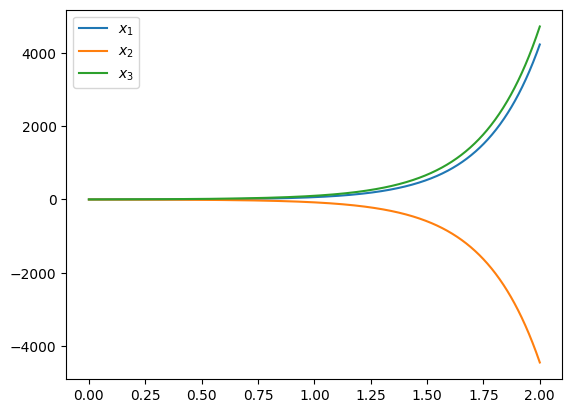

In [70]:
x = lambda t: 1/2*(1*(np.exp(2*t)*(1+np.exp(2*t)-2*t))+1*(-2*t*np.exp(2*t))+2*(np.exp(2*t)*(-1+np.exp(2*t))))
y = lambda t: 1/2*((-np.exp(2*t)*(-1+np.exp(2*t)-2*t))+(-2*(t+1)*np.exp(2*t))+2*(-np.exp(2*t)*(-1+np.exp(2*t))))
z = lambda t: 1/2*((np.exp(2*t)*(-1+np.exp(2*t)+2*t))+(2*t*np.exp(2*t))+2*(np.exp(2*t)*(1+np.exp(2*t))))
plt.plot(T, x(T), label="$x_1$")
plt.plot(T, y(T), label="$x_2$")
plt.plot(T, z(T), label="$x_3$")
plt.legend()


## Punto 4: **Modelo de población de una especie de pajaros**
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1)
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que:

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix}
0 & 2 \\
0.3 & 0.5
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A

In [2]:
import numpy as np

P0=np.array([5, 20])
A=np.array([[0, 2],[0.3, 0.5]])
P=P0.copy()

for i in range(1000):
    P=np.floor(np.linalg.matrix_power(A, i)@P0)
print(P[0]/P[1])

1.8798034326832846


## Mi interpretación del enunciado
Si no me equivoco, $P_n=a_1\lambda_1 \vec v_1+a_2\lambda_2 \vec v_2$. Donde $a_1$ y $a_2$ son las coordenadas que expresan a $P_0$ respecto a la base $\{\vec v_1,\vec v_2\}$.

In [14]:
# Encontrando a1, y a2:

a_val, a_vec = np.linalg.eig(A)

a1, a2 = np.linalg.solve(a_vec, P0)

P=P0.copy()

for i in range(100): # Corroborando que el método funciona
    P=np.linalg.matrix_power(A, i)@P0
    print(f"{i}-ésimo valor: {a1*a_val[0]**i*a_vec[::,0]+a2*a_val[1]**i*a_vec[::,1]}\n Error: {np.abs(a1*a_val[0]**i*a_vec[::,0]+a2*a_val[1]**i*a_vec[::,1]-P)}\n")


0-ésimo valor: [ 5. 20.]
 Error: [0. 0.]

1-ésimo valor: [40.  11.5]
 Error: [0. 0.]

2-ésimo valor: [23.   17.75]
 Error: [0.00000000e+00 3.55271368e-15]

3-ésimo valor: [35.5   15.775]
 Error: [1.42108547e-14 3.55271368e-15]

4-ésimo valor: [31.55   18.5375]
 Error: [7.10542736e-15 7.10542736e-15]

5-ésimo valor: [37.075   18.73375]
 Error: [2.13162821e-14 7.10542736e-15]

6-ésimo valor: [37.4675   20.489375]
 Error: [2.13162821e-14 1.06581410e-14]

7-ésimo valor: [40.97875   21.4849375]
 Error: [2.84217094e-14 1.06581410e-14]

8-ésimo valor: [42.969875   23.03609375]
 Error: [2.13162821e-14 1.06581410e-14]

9-ésimo valor: [46.0721875  24.40900938]
 Error: [3.55271368e-14 1.06581410e-14]

10-ésimo valor: [48.81801875 26.02616094]
 Error: [2.13162821e-14 2.13162821e-14]

11-ésimo valor: [52.05232188 27.65848609]
 Error: [4.26325641e-14 2.48689958e-14]

12-ésimo valor: [55.31697219 29.44493961]
 Error: [6.39488462e-14 3.19744231e-14]

13-ésimo valor: [58.88987922 31.31756146]
 Error: [